In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"D:\My Work\Supermarket-Sales-Analysis\Data\Sample - Superstore.csv", encoding='latin1', index_col=0)

In [3]:
print("Shape (rows, columns):", df.shape)

Shape (rows, columns): (9994, 20)


In [4]:
display(df.head())

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,,,,,,
1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [5]:
print("\n--- Data Types ---")
print(df.dtypes)


--- Data Types ---
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object


In [6]:
print("\n--- DataFrame Info ---")
df.info()


--- DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
Index: 9994 entries, 1 to 9994
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Order Date     9994 non-null   object 
 2   Ship Date      9994 non-null   object 
 3   Ship Mode      9994 non-null   object 
 4   Customer ID    9994 non-null   object 
 5   Customer Name  9994 non-null   object 
 6   Segment        9994 non-null   object 
 7   Country        9994 non-null   object 
 8   City           9994 non-null   object 
 9   State          9994 non-null   object 
 10  Postal Code    9994 non-null   int64  
 11  Region         9994 non-null   object 
 12  Product ID     9994 non-null   object 
 13  Category       9994 non-null   object 
 14  Sub-Category   9994 non-null   object 
 15  Product Name   9994 non-null   object 
 16  Sales          9994 non-null   float64
 17  Quantity       9994 non-null   in

In [7]:
print("\n--- Basic Stats ---")
display(df.describe())


--- Basic Stats ---


,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [8]:
print("\n--- Missing Values ---")
display(df.isnull().sum())


--- Missing Values ---


Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [9]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ','_')
print("✅ Cleaned column names:")
print(df.columns.tolist())

✅ Cleaned column names:
['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_id', 'customer_name', 'segment', 'country', 'city', 'state', 'postal_code', 'region', 'product_id', 'category', 'sub-category', 'product_name', 'sales', 'quantity', 'discount', 'profit']


In [10]:
for col in df.columns:
    if 'date' in col.lower():  # any column name containing 'date'
        df[col] = pd.to_datetime(df[col], errors='coerce')

# Convert numeric columns that may be stored as text
for col in ['unit_price', 'quantity', 'total']:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

print("\n✅ Checked and fixed data types:")
print(df.dtypes)


✅ Checked and fixed data types:
order_id                 object
order_date       datetime64[ns]
ship_date        datetime64[ns]
ship_mode                object
customer_id              object
customer_name            object
segment                  object
country                  object
city                     object
state                    object
postal_code               int64
region                   object
product_id               object
category                 object
sub-category             object
product_name             object
sales                   float64
quantity                  int64
discount                float64
profit                  float64
dtype: object


In [11]:
before = df.shape[0]
df = df.drop_duplicates()
after = df.shape[0]
print(f"\n✅ Removed duplicates: {before - after}")


✅ Removed duplicates: 1


In [13]:
print("\n🕵️ Missing values:")
print(df.isnull().sum())



🕵️ Missing values:
order_id         0
order_date       0
ship_date        0
ship_mode        0
customer_id      0
customer_name    0
segment          0
country          0
city             0
state            0
postal_code      0
region           0
product_id       0
category         0
sub-category     0
product_name     0
sales            0
quantity         0
discount         0
profit           0
dtype: int64


In [14]:
df.head()

,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,region,product_id,category,sub-category,product_name,sales,quantity,discount,profit
Row ID,,,,,,,,,,,,,,,,,,,,
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [17]:
# Create time-based features
df['order_year'] = df['order_date'].dt.year
df['order_month'] = df['order_date'].dt.month
df['order_month_name'] = df['order_date'].dt.month_name()
df['order_day'] = df['order_date'].dt.day
df['order_day_name'] = df['order_date'].dt.day_name()

# Calculate shipping duration (in days)
df['shipping_days'] = (df['ship_date'] - df['order_date']).dt.days

# Quick check
df[['order_date', 'ship_date', 'order_year', 'order_month_name', 'order_day_name', 'shipping_days']].head()


,order_date,ship_date,order_year,order_month_name,order_day_name,shipping_days
Row ID,,,,,,
1,2016-11-08,2016-11-11,2016,November,Tuesday,3
2,2016-11-08,2016-11-11,2016,November,Tuesday,3
3,2016-06-12,2016-06-16,2016,June,Sunday,4
4,2015-10-11,2015-10-18,2015,October,Sunday,7
5,2015-10-11,2015-10-18,2015,October,Sunday,7


In [18]:
# Basic overview before deeper EDA
print("Basic info:")
print(df[['sales', 'quantity', 'discount', 'profit']].describe())

print("\nUnique values per categorical column:")
for col in ['region', 'category', 'sub-category', 'order_month_name', 'order_day_name']:
    if col in df.columns:
        print(f"{col}: {df[col].nunique()} unique values")

print("\nTop 5 regions or cities by total sales:")
if 'region' in df.columns:
    display(df.groupby('region')['sales'].sum().sort_values(ascending=False).head())
elif 'city' in df.columns:
    display(df.groupby('city')['sales'].sum().sort_values(ascending=False).head())


Basic info:
              sales     quantity     discount       profit
count   9993.000000  9993.000000  9993.000000  9993.000000
mean     229.852846     3.789753     0.156188    28.660971
std      623.276074     2.225149     0.206457   234.271476
min        0.444000     1.000000     0.000000 -6599.978000
25%       17.280000     2.000000     0.000000     1.731000
50%       54.480000     3.000000     0.200000     8.671000
75%      209.940000     5.000000     0.200000    29.364000
max    22638.480000    14.000000     0.800000  8399.976000

Unique values per categorical column:
region: 4 unique values
category: 3 unique values
sub-category: 17 unique values
order_month_name: 12 unique values
order_day_name: 7 unique values

Top 5 regions or cities by total sales:


region
West       725457.8245
East       678499.8680
Central    501239.8908
South      391721.9050
Name: sales, dtype: float64

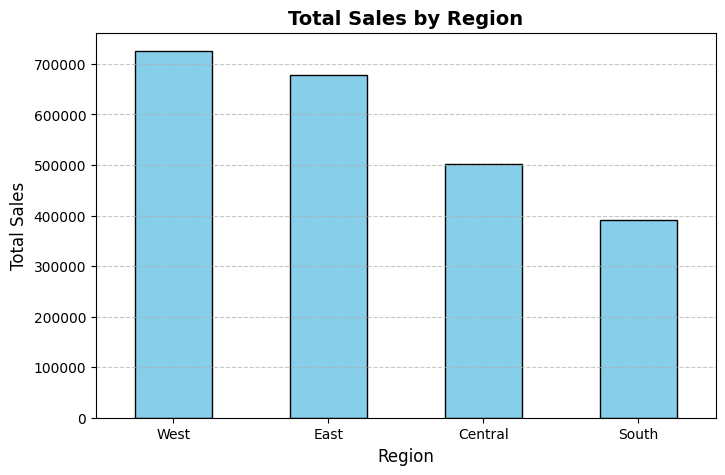

In [19]:
# Group and sort
region_sales = df.groupby('region')['sales'].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(8,5))
region_sales.plot(kind='bar', color='skyblue', edgecolor='black')

# Add labels and title
plt.title("Total Sales by Region", fontsize=14, weight='bold')
plt.xlabel("Region", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show
plt.show()

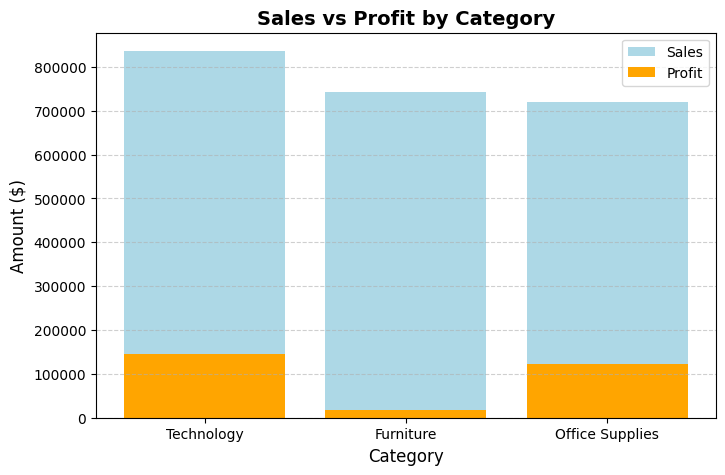

In [20]:
# Group by category and aggregate sales + profit
category_summary = (
    df.groupby('category')[['sales', 'profit']]
      .sum()
      .sort_values('sales', ascending=False)
)

# Plot
plt.figure(figsize=(8,5))
plt.bar(category_summary.index, category_summary['sales'], color='lightblue', label='Sales')
plt.bar(category_summary.index, category_summary['profit'], color='orange', label='Profit')

plt.title("Sales vs Profit by Category", fontsize=14, weight='bold')
plt.xlabel("Category", fontsize=12)
plt.ylabel("Amount ($)", fontsize=12)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


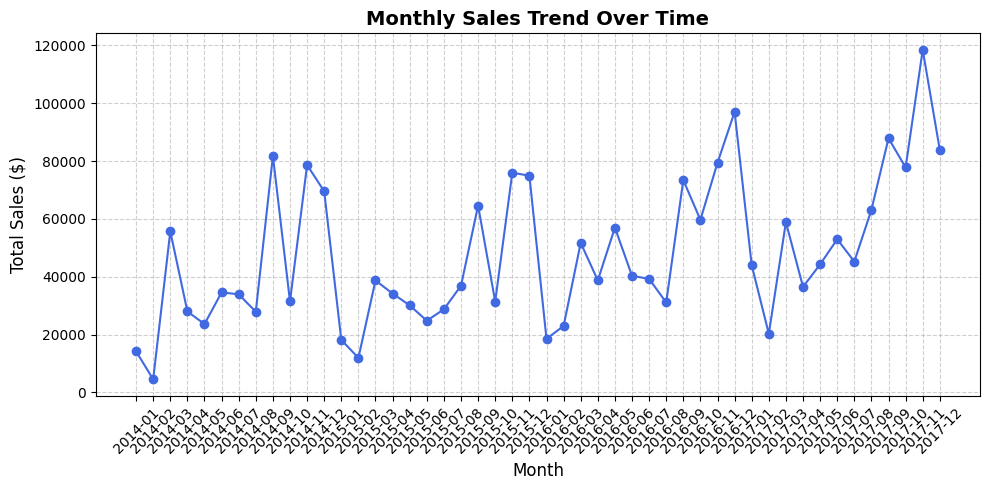

In [21]:
# Group by year and month to see total sales trend
monthly_sales = (
    df.groupby(['order_year', 'order_month'])['sales']
      .sum()
      .reset_index()
      .sort_values(['order_year', 'order_month'])
)

# Create a 'Year-Month' label for x-axis
monthly_sales['year_month'] = (
    monthly_sales['order_year'].astype(str) + '-' +
    monthly_sales['order_month'].astype(str).str.zfill(2)
)

# Plot
plt.figure(figsize=(10,5))
plt.plot(monthly_sales['year_month'], monthly_sales['sales'], marker='o', color='royalblue')

plt.title("Monthly Sales Trend Over Time", fontsize=14, weight='bold')
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Sales ($)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
